# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Import dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

# Splitting dataset into train and test

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fitting Knn classifier to training set

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# Predicting test result

In [9]:
y_pred = classifier.predict(X_test)

# Creating Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# Visualising training set

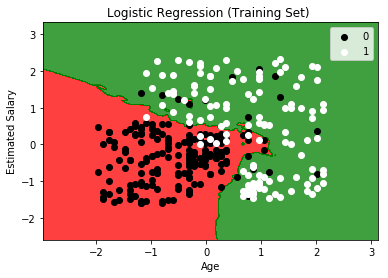

In [11]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train , y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop= X_set[:,0].max()+1,step=0.01),
                       np.arange(start=X_set[:,1].min()-1, stop= X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')) )

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('black','white'))(i),label=j)
    
plt.title('K-NN (Training Set) ')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising test set

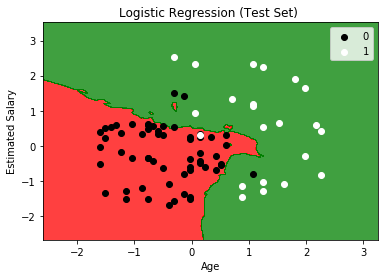

In [12]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test, y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop= X_set[:,0].max()+1,step=0.01),
                       np.arange(start=X_set[:,1].min()-1, stop= X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')) )

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('black','white'))(i),label=j)
    
plt.title('K-NN (Test Set) ')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()